<a href="https://colab.research.google.com/github/Ishita95-harvad/Red-Wine-Quality/blob/main/Red_Wine_Quality_Simple_and_clean_practice_dataset_for_regression_or_classification_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

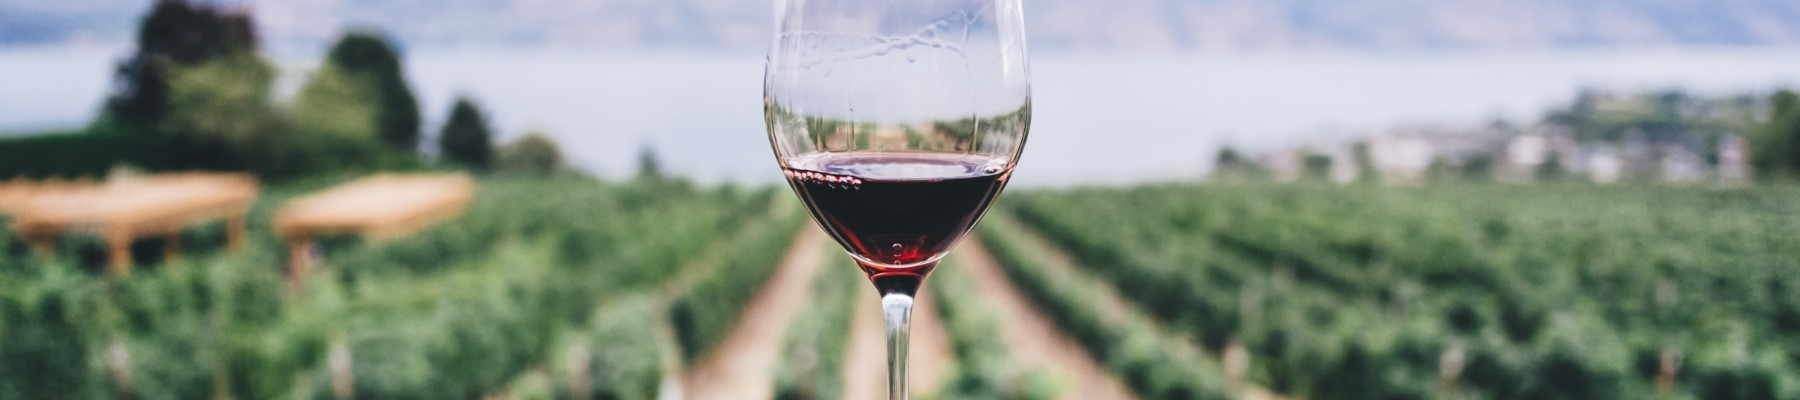

# Red Wine Quality

Simple and clean practice dataset for regression or classification modelling.

## Data loading

### Subtask:
Load the "winequality-red.csv" dataset.


**Reasoning**:
Load the dataset and display the first few rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('winequality-red.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'winequality-red.csv' not found.")
    df = None  # Indicate that the DataFrame was not created successfully
except pd.errors.EmptyDataError:
    print("Error: 'winequality-red.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'winequality-red.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


## Data exploration

### Subtask:
Explore the loaded wine quality dataset.


**Reasoning**:
Explore the data by examining data types, descriptive statistics, missing values, and the distribution of the 'quality' variable, including a visualization.



Data Types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Descriptive Statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.60000

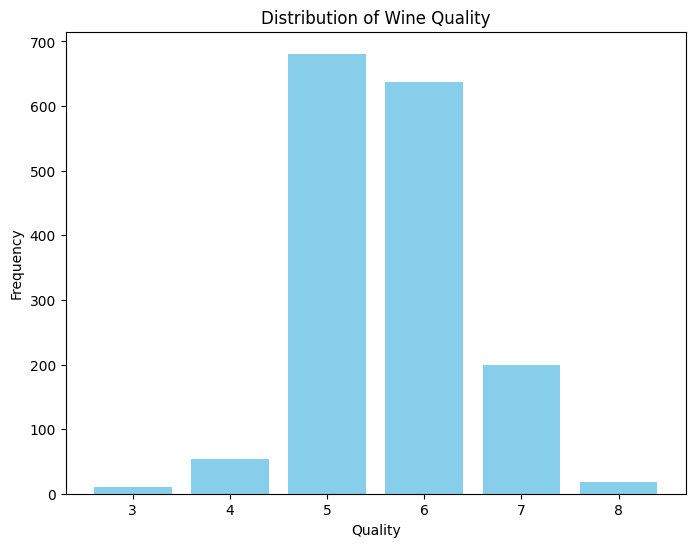

In [2]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Analyze the distribution of the 'quality' variable
quality_counts = df['quality'].value_counts()
print("\nQuality Distribution:\n", quality_counts)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts.values, color='skyblue')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

## Data cleaning

### Subtask:
Handle potential outliers in the dataset.


**Reasoning**:
Create box plots to visualize the distribution of numerical features and identify potential outliers. Then, use the IQR method to handle outliers in the identified features. Finally, re-examine the descriptive statistics and box plots to ensure the outlier treatment was effective.



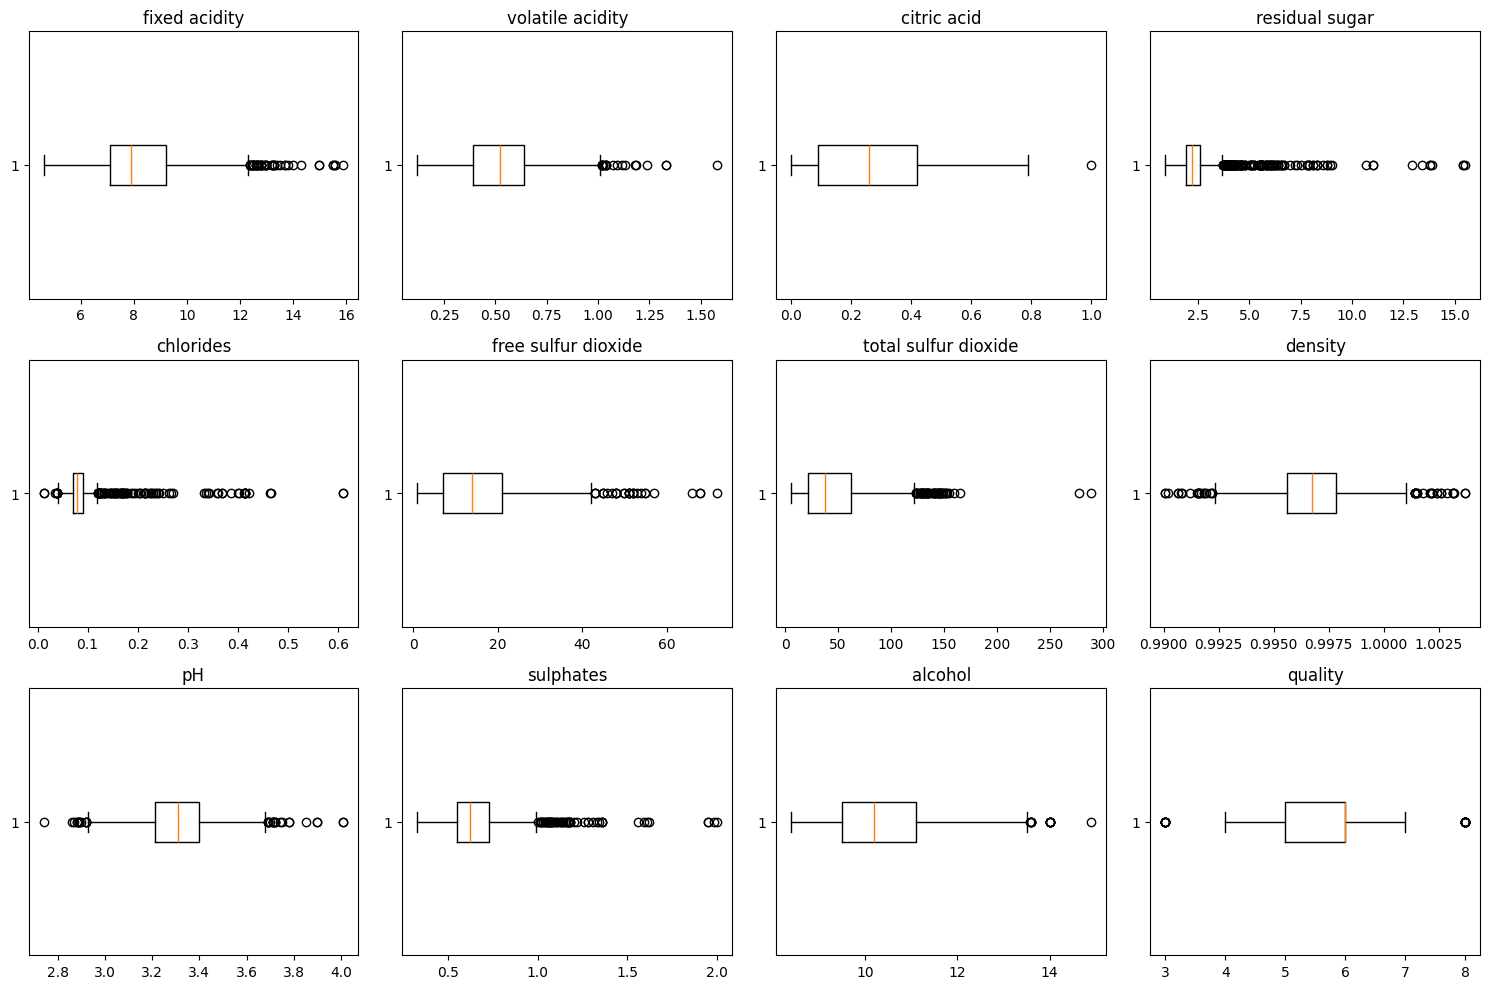

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.322358   
std         1.741096          0.179060     0.194801        0.609493   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000        3.650000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.081194            15.874922             45.714822     0.996747   
std       0.017822            10.460157             30.374029     0.001887   
min       0.040000             1.000000         

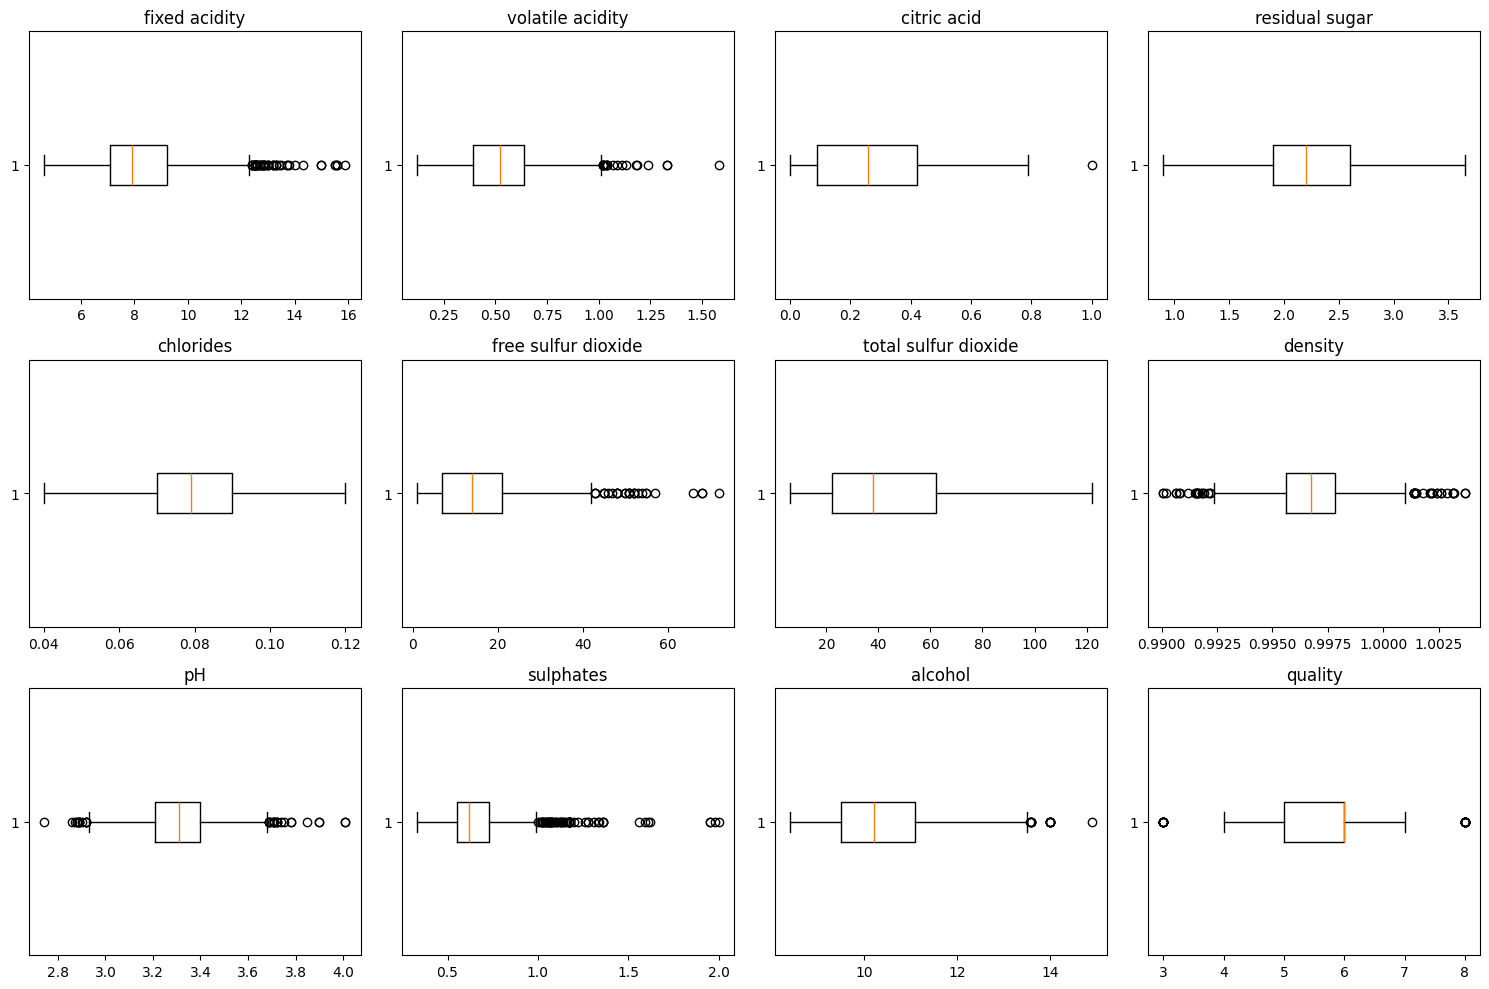

In [3]:
import matplotlib.pyplot as plt

# Create box plots to visualize the distribution of numerical features.
numerical_features = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[col], vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()

# Identify features with outliers based on the box plots.
# Features like 'chlorides', 'total sulfur dioxide', 'residual sugar' appear to have outliers.

# Handle outliers using the IQR method.
def handle_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the IQR method to the identified features.
for col in ['chlorides', 'total sulfur dioxide', 'residual sugar']:
    df = handle_outliers_iqr(df, col)

# Re-examine the descriptive statistics and box plots after outlier handling.
print(df.describe())

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[col], vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize the relationships between features and the 'quality' variable, and visualize the distribution of key features.


**Reasoning**:
Generate histograms, box plots, and scatter plots to visualize the relationships between features and the 'quality' variable, and visualize the distribution of key features.



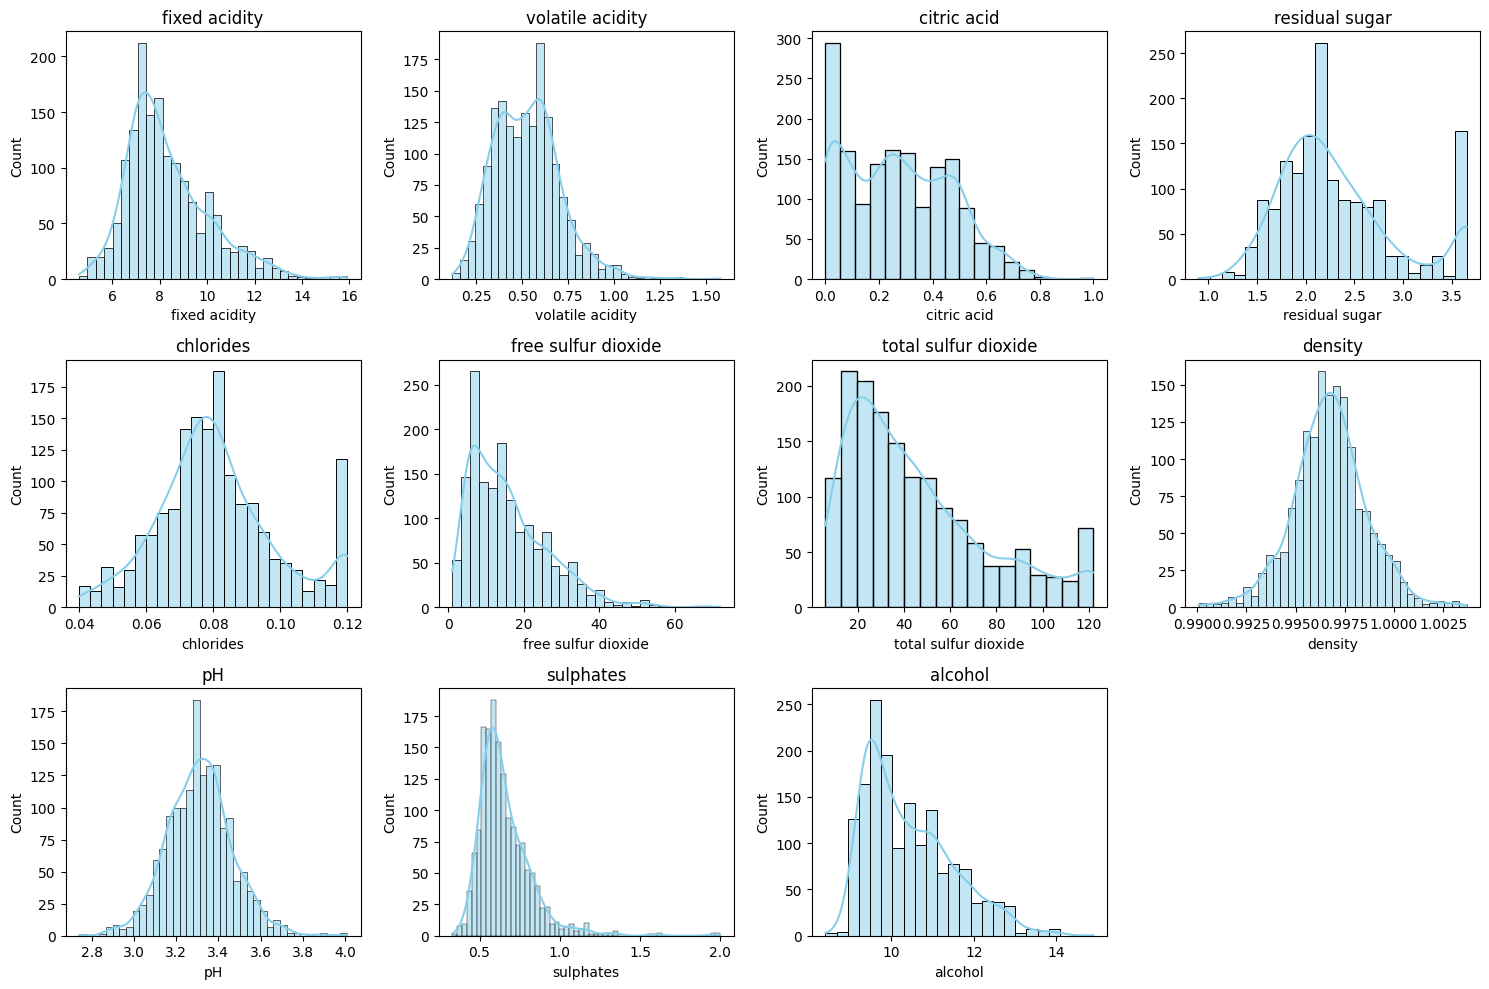

<ipython-input-4-548ca8c29be0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='viridis')
<ipython-input-4-548ca8c29be0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='viridis')
<ipython-input-4-548ca8c29be0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='viridis')
<ipython-input-4-548ca8c29be0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

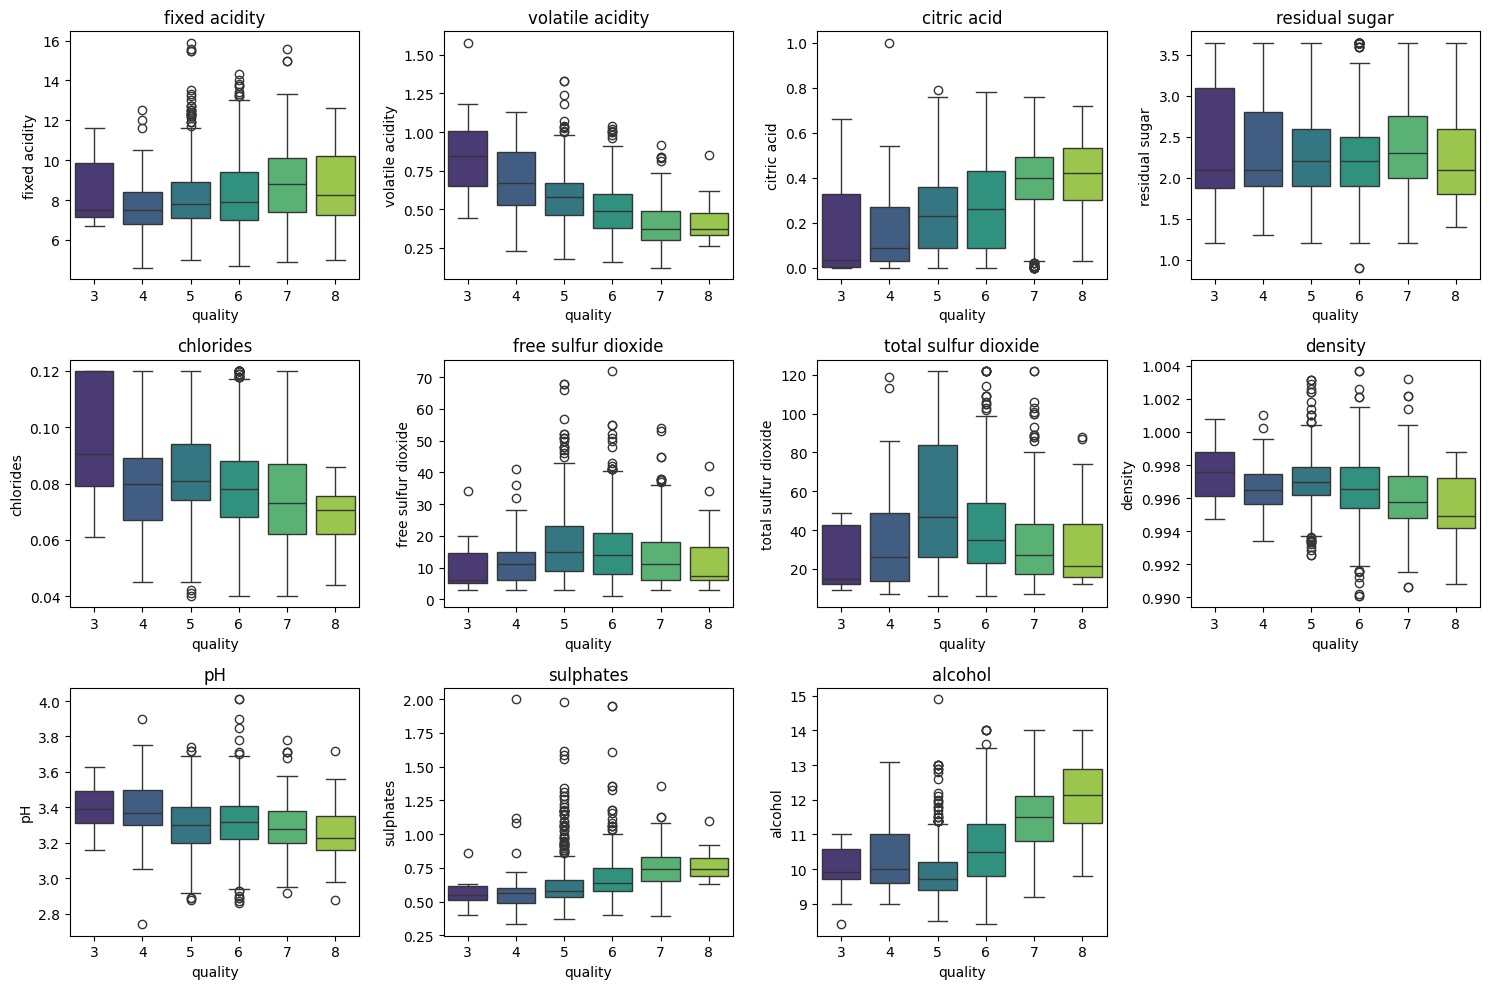

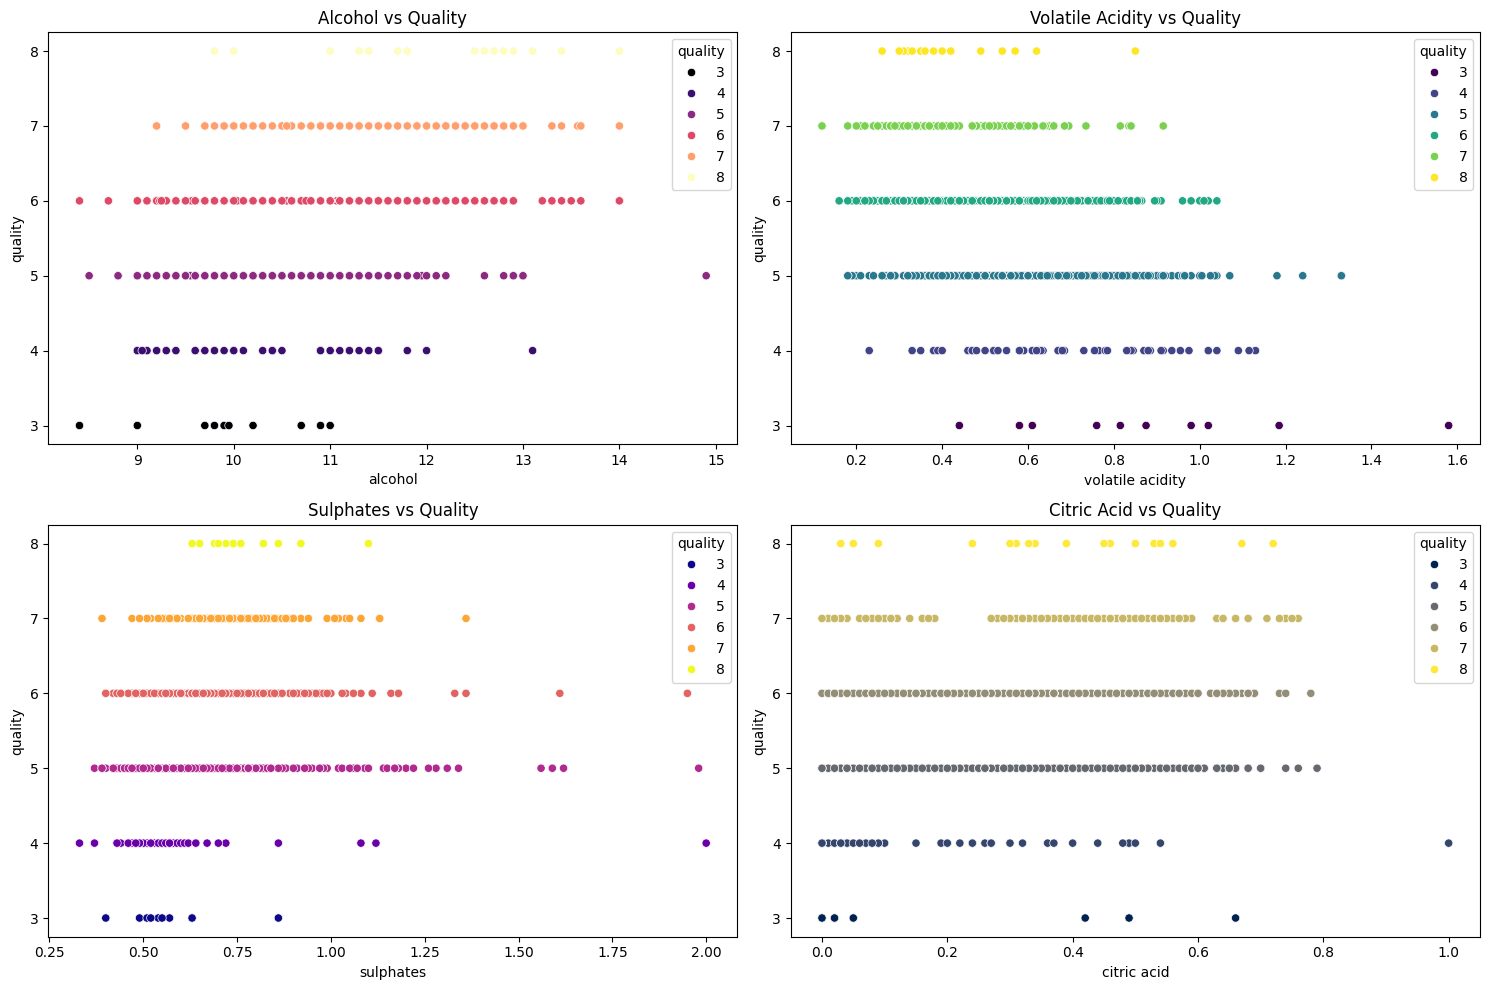

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude 'quality'
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


# Box plots grouped by quality
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='quality', y=col, data=df, palette='viridis')
    plt.title(col)
plt.tight_layout()
plt.show()

# Scatter plots of suspected correlated features vs. quality
plt.figure(figsize=(15, 10))

# Example: 'alcohol' vs 'quality'
plt.subplot(2, 2, 1)
sns.scatterplot(x='alcohol', y='quality', data=df, hue='quality', palette='magma')
plt.title('Alcohol vs Quality')

# Example: 'volatile acidity' vs 'quality'
plt.subplot(2, 2, 2)
sns.scatterplot(x='volatile acidity', y='quality', data=df, hue='quality', palette='viridis')
plt.title('Volatile Acidity vs Quality')

# Example: 'sulphates' vs 'quality'
plt.subplot(2, 2, 3)
sns.scatterplot(x='sulphates', y='quality', data=df, hue='quality', palette='plasma')
plt.title('Sulphates vs Quality')

# Example: 'citric acid' vs 'quality'
plt.subplot(2, 2, 4)
sns.scatterplot(x='citric acid', y='quality', data=df, hue='quality', palette='cividis')
plt.title('Citric Acid vs Quality')


plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Engineer new features and potentially normalize/standardize existing ones.


**Reasoning**:
Create interaction and ratio features, then normalize/standardize the features using StandardScaler.



In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Interaction features
df['alcohol_sulphates'] = df['alcohol'] * df['sulphates']
df['volatile_acidity_fixed_acidity'] = df['volatile acidity'] * df['fixed acidity']

# Ratio features
df['free_sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

# Features to scale
features_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol', 'alcohol_sulphates', 'volatile_acidity_fixed_acidity',
                     'free_sulfur_ratio']

# Normalize/Standardize features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_sulphates,volatile_acidity_fixed_acidity,free_sulfur_ratio
0,-0.528360,0.961877,-1.391472,-0.693182,-0.291550,-0.466193,-0.385806,0.558274,1.288643,-0.579207,-0.960246,5,-0.838038,0.572375,-0.390250
1,-0.298547,1.967442,-1.391472,0.455672,0.943237,0.872638,0.700988,0.028261,-0.719933,0.128950,-0.584777,5,-0.110561,1.682163,-0.067821
2,-0.298547,1.297065,-1.186070,-0.036694,0.606477,-0.083669,0.272857,0.134264,-0.331177,-0.048089,-0.584777,5,-0.263331,1.065322,-0.687634
3,1.654856,-1.384443,1.484154,-0.693182,-0.347676,0.107592,0.470456,0.664277,-0.979104,-0.461180,-0.584777,6,-0.619795,-0.774660,-0.651523
4,-0.528360,0.961877,-1.391472,-0.693182,-0.291550,-0.466193,-0.385806,0.558274,1.288643,-0.579207,-0.960246,5,-0.838038,0.572375,-0.390250


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split` and stratify by 'quality'.



In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# First split: 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: split the temp data into validation (15% of total) and test (15% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(1119, 14) (240, 14) (240, 14)


## Model training

### Subtask:
Train multiple regression models to predict wine quality.


**Reasoning**:
Train multiple regression models (Linear Regression, Random Forest Regressor, Gradient Boosting Regressor) on the training data and store them in a dictionary.



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained regression models using the validation set.


**Reasoning**:
Optimize the hyperparameters of the trained regression models using the validation set.



In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define parameter grids for each model
param_grids = {
    'Linear Regression': {},  # No hyperparameters to tune for Linear Regression
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }
}

# Define scoring metrics
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Perform hyperparameter tuning for each model
best_estimators = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring=scoring, refit='neg_mean_squared_error', cv=5, n_jobs=-1)
        grid_search.fit(X_val, y_val)
        best_estimators[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best score for {name}: {grid_search.best_score_}")
    else:
        best_estimators[name] = model
        print(f"No hyperparameter tuning for {name} (no parameters specified in param_grids).")

Best parameters for Linear Regression: {}
Best score for Linear Regression: -0.4885651964998433
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: -0.4244695479166226
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best score for Gradient Boosting: -0.4398010977750909


## Model evaluation

### Subtask:
Evaluate the performance of the optimized regression models on the test set.


**Reasoning**:
Evaluate the performance of the optimized regression models on the test set using the specified metrics and compare them with validation set scores.



In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

evaluation_results = []

for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evaluation_results.append([name, mse, rmse, mae, r2])

results_df = pd.DataFrame(evaluation_results, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])
display(results_df)

# Comparing test and validation set scores (assuming we have the validation set scores)
# This part needs the validation set scores from model optimization to make the comparison.
# Placeholder for comparison - Replace with actual validation scores
# validation_scores = {...}  # Put your validation set scores here

# for index, row in results_df.iterrows():
#     model_name = row['Model']
#     test_score = row['MSE']  # or other metric
#     val_score = validation_scores.get(model_name, None) # Get validation score for current model
#     if val_score:
#         print(f"{model_name} - Test MSE: {test_score}, Validation MSE: {val_score}")
#         # Comparison logic, for example:
#         if abs(test_score - val_score) > 0.1:
#             print(f"Significant difference between test and validation scores for {model_name}")

# Overfitting/Underfitting Analysis
# print("Overfitting/Underfitting Analysis")
# for index, row in results_df.iterrows():
#     # Example threshold, adjust as needed.
#     if row['R2'] < 0.5 :
#         print(f"{row['Model']} -  Potential underfitting.")
#     elif abs(row["MSE"] - validation_scores[row['Model']]) > 0.1:
#         print(f"{row['Model']} - Potential overfitting.")

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,0.395631,0.628992,0.489115,0.392310
1,Random Forest,0.368279,0.606860,0.476022,0.434323
2,Gradient Boosting,0.393480,0.627280,0.507302,0.395615


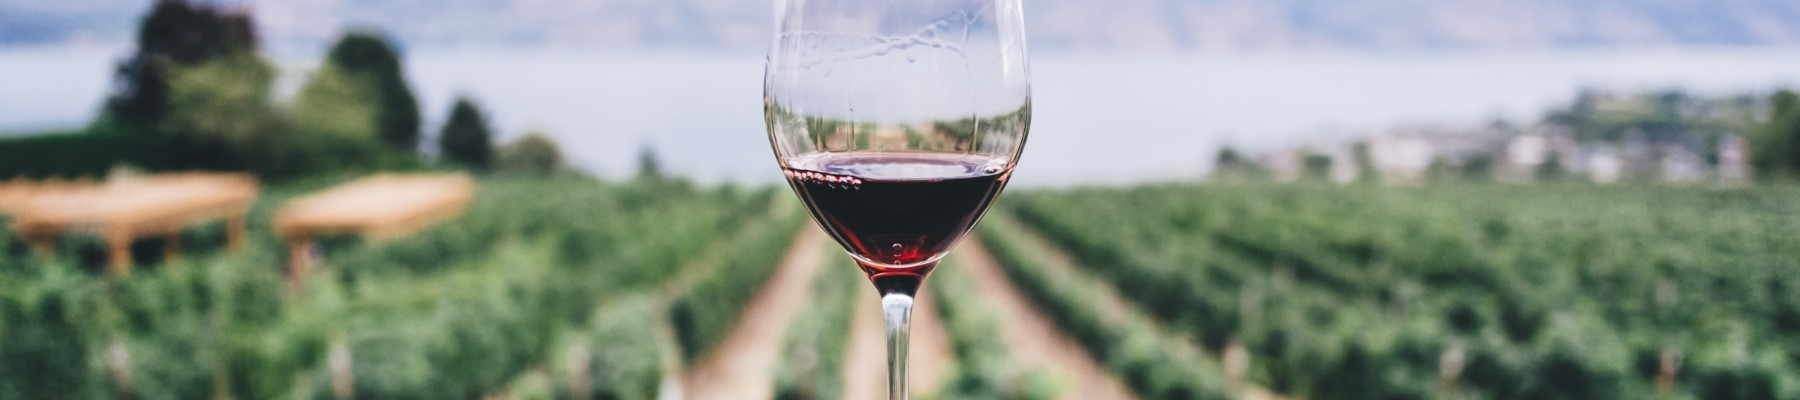